In [1]:
from pathlib import Path
import numpy as np
import logging

import pyvista as pv
pv.set_jupyter_backend("pythreejs")

from project_heart.enums import *
from project_heart.lv import LV

In [2]:
filepath = Path("C:/Users/igorp/Downloads/0.3_80.00_50.00_LVIDEAL_HEX20.xplt")
# filepath = Path("C:/Users/igornobrega/Downloads/0.3_80.00_50.00_LVIDEAL_HEX20.xplt")

# Load File and Create Speckles

In [3]:
lv = LV.from_file(filepath, log_level=logging.DEBUG)
lv.identify_regions(LV_GEO_TYPES.IDEAL,
    apex_base_args={"ab_ql":0.03, "ab_qh":0.90},
    endo_epi_args={"threshold":85,})
lv.plot("mesh", 
        scalars=LV_MESH_DATA.SURFS,
        container="points",
        show_edges=True,
        categorical=True,
        split_sharp_edges=True,
        smooth_shading=False,
        pretty=False,
        vnodes=[
            (LV_VIRTUAL_NODES.BASE, "red"),
            (LV_VIRTUAL_NODES.APEX, "red")
            ],
        )

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(position=(50000.000000…

## Create Longitudinal Speckles

In [4]:
for i, a in enumerate(np.linspace(0, np.pi, 6, endpoint=False)):
    
    spk = lv.create_speckles(
        collection="long-6",
        group="endo",
        name=str(i),
        from_nodeset=LV_SURFS.ENDO,
        exclude_nodeset=LV_SURFS.BASE, # does not afect ideal case
        d=1.75,
        k=0.5,
        normal_to=[np.cos(a),np.sin(a),0.0],
        n_subsets=6,
        subsets_criteria="z2",
        t=0.0,
        kmin=0.125,
        kmax=0.95,
        log_level=logging.INFO,
    )

    spk = lv.create_speckles(
        collection="long-6",
        group="epi",
        name=str(i),
        from_nodeset=LV_SURFS.EPI,
        exclude_nodeset=LV_SURFS.BASE, # does not afect ideal case
        d=2.4,
        k=0.5,
        normal_to=[np.cos(a),np.sin(a),0.0],
        n_subsets=6,
        subsets_criteria="z2",
        t=0.0,
        kmin=0.125,
        kmax=0.95,
        log_level=logging.INFO,
    )

lv.set_region_from_speckles("long-6", spk_collection="long-6")
lv.plot(
    scalars="long-6", 
    categorical=True, 
    cmap="jet",
    vnodes=[
            (LV_VIRTUAL_NODES.BASE, "red"),
            (LV_VIRTUAL_NODES.APEX, "red")
            ],
    )



INFO:create_speckles:Speckle: name: 0, group: endo, collection: long-6
INFO:create_speckles:Speckle: name: 0, group: epi, collection: long-6
INFO:create_speckles:Speckle: name: 1, group: endo, collection: long-6
INFO:create_speckles:Speckle: name: 1, group: epi, collection: long-6
INFO:create_speckles:Speckle: name: 2, group: endo, collection: long-6
INFO:create_speckles:Speckle: name: 2, group: epi, collection: long-6
INFO:create_speckles:Speckle: name: 3, group: endo, collection: long-6
INFO:create_speckles:Speckle: name: 3, group: epi, collection: long-6
INFO:create_speckles:Speckle: name: 4, group: endo, collection: long-6
INFO:create_speckles:Speckle: name: 4, group: epi, collection: long-6
INFO:create_speckles:Speckle: name: 5, group: endo, collection: long-6
INFO:create_speckles:Speckle: name: 5, group: epi, collection: long-6


Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(position=(50000.000000…

## Create circumferential speckles

In [5]:
names = ["subapex", "apex", "superapex", "submid", "mid", "supermid", "subbase", "base", "superbase"]

for i, a in enumerate(np.linspace(0.1, 1.0, len(names), endpoint=False)):
    
    spk = lv.create_speckles(
        collection="circ-6",
        group="endo",
        name=names[i],
        from_nodeset=LV_SURFS.ENDO,
        d=1.75,
        k=a,
        normal_to=[0.0, 0.0, 1.0],
        n_subsets=6,
        subsets_criteria="angles",
        t=0.0,
        kmin=-1.0,
        kmax=-1.0,
        log_level=logging.INFO,
    )

    spk = lv.create_speckles(
        collection="circ-6",
        group="epi",
        name=names[i],
        from_nodeset=LV_SURFS.EPI,
        d=1.75,
        k=a,
        normal_to=[0.0, 0.0, 1.0],
        n_subsets=6,
        subsets_criteria="angles",
        t=0.0,
        kmin=-1.0,
        kmax=-1.0,
        log_level=logging.INFO,
    )

lv.set_region_from_speckles("circ-6", spk_collection="circ-6")
lv.plot(
    scalars="circ-6", 
    categorical=True, 
    cmap="jet",
    vnodes=[
            (LV_VIRTUAL_NODES.BASE, "red"),
            (LV_VIRTUAL_NODES.APEX, "red")
            ],
    )

INFO:create_speckles:Speckle: name: subapex, group: endo, collection: circ-6
INFO:create_speckles:Speckle: name: subapex, group: epi, collection: circ-6
INFO:create_speckles:Speckle: name: apex, group: endo, collection: circ-6
INFO:create_speckles:Speckle: name: apex, group: epi, collection: circ-6
INFO:create_speckles:Speckle: name: superapex, group: endo, collection: circ-6
INFO:create_speckles:Speckle: name: superapex, group: epi, collection: circ-6
INFO:create_speckles:Speckle: name: submid, group: endo, collection: circ-6
INFO:create_speckles:Speckle: name: submid, group: epi, collection: circ-6
INFO:create_speckles:Speckle: name: mid, group: endo, collection: circ-6
INFO:create_speckles:Speckle: name: mid, group: epi, collection: circ-6
INFO:create_speckles:Speckle: name: supermid, group: endo, collection: circ-6
INFO:create_speckles:Speckle: name: supermid, group: epi, collection: circ-6
INFO:create_speckles:Speckle: name: subbase, group: endo, collection: circ-6
INFO:create_spe

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(position=(50000.000000…

# Compute Metric

Using some subset for numerical validation

Using 'base' subset as reference, we expect a radius of 30 and ~24.5 at first and last timesteps, respectively. 

Expected values for timesteps [0, 0.1 and 1.1]:

- Radius Endo (approx):    25,  17,  17.5
- Radius Epi (approx):     35,  32,  32
- Thickness:               10,  15,  14.5

In [6]:
endo_circ_spks = lv.get_speckles(spk_name="base", spk_group="endo", spk_collection="circ-6")
epi_circ_spks = lv.get_speckles(spk_name="base", spk_group="epi", spk_collection="circ-6")

lv.thickness(endo_circ_spks, epi_circ_spks, log_level=logging.DEBUG)

INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.WALL_THICKNESS'
DEBUG:LV.BaseMetricsComputations:Computing speckle thickness for spks: '<Speckle: .subset: 0, .name: base, .group: endo, .collection: circ-6, .t: 0.0>' and '<Speckle: .subset: 0, .name: base, .group: epi, .collection: circ-6, .t: 0.0>
DEBUG:LV.BaseMetricsComputations:Metric 'RADIAL_LENGTH' not found for spk '<Speckle: .subset: 0, .name: base, .group: endo, .collection: circ-6, .t: 0.0>'. Will try to compute.
INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.RADIAL_LENGTH'
INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.RADIAL_LENGTH'
DEBUG:LV.BaseMetricsComputations:Computing speckle thickness for spks: '<Speckle: .subset: 1, .name: base, .group: endo, .collection: circ-6, .t: 0.0>' and '<Speckle: .subset: 1, .name: base, .group: epi, .collection: circ-6, .t: 0.0>
DEBUG:LV.BaseMetricsComputations:Metric 'RADIAL_LENGTH' not found for spk '<Speckle: .subset: 1, .name: base, .group: endo, .co

array([ 9.98539091, 11.15550916, 12.54106094, 13.48535308, 14.65326385,
       14.6435103 , 14.63588653, 14.62641406, 14.61671013, 14.60742217,
       14.60021596, 14.59228482, 14.58515592, 14.57600687, 14.56999612,
       14.55867732, 14.55160683, 14.54246566, 14.5353931 , 14.52623162,
       14.51914555, 14.4982922 , 14.49119138, 14.48197122, 14.48641194,
       14.47714293, 14.46997139, 14.45070275, 14.44092073, 14.42917938,
       14.41863229, 14.41414252, 14.40413759, 14.3946727 , 14.38786855,
       14.37834216, 14.37094085, 14.36134919, 14.35388692, 14.34422823,
       14.33670282, 14.32748905, 14.31536159, 14.3032333 , 14.29772083])

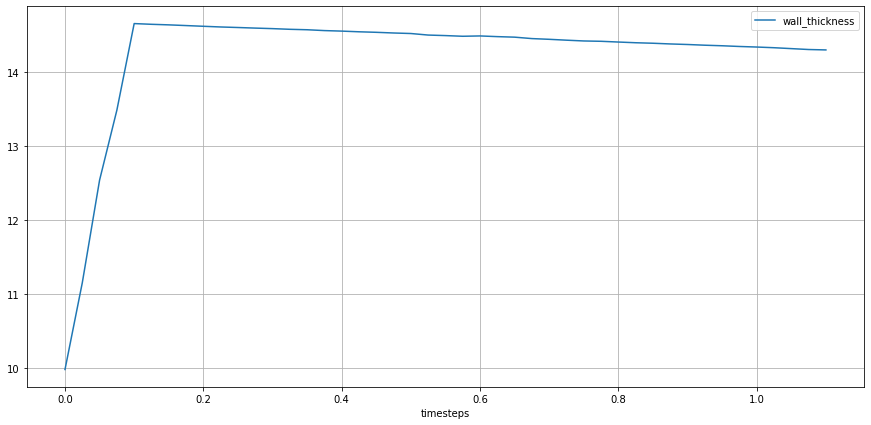

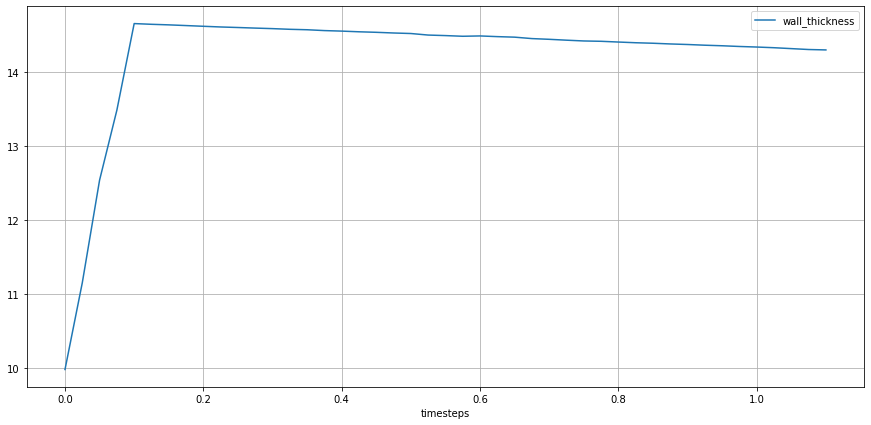

In [7]:
lv.plot_metric(lv.STATES.THICKNESS, from_ts=0.0, plot_infos={'group'})

Using all avaiable speckles

INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.WALL_THICKNESS'
INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.RADIAL_LENGTH'
INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.RADIAL_LENGTH'
INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.RADIAL_LENGTH'
INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.RADIAL_LENGTH'
INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.RADIAL_LENGTH'
INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.RADIAL_LENGTH'
INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.RADIAL_LENGTH'
INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.RADIAL_LENGTH'
INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.RADIAL_LENGTH'
INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.RADIAL_LENGTH'
INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.RADIAL_LENGTH'
INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.RADIAL_LENGTH'
INFO:LV.BaseMetricsCompu

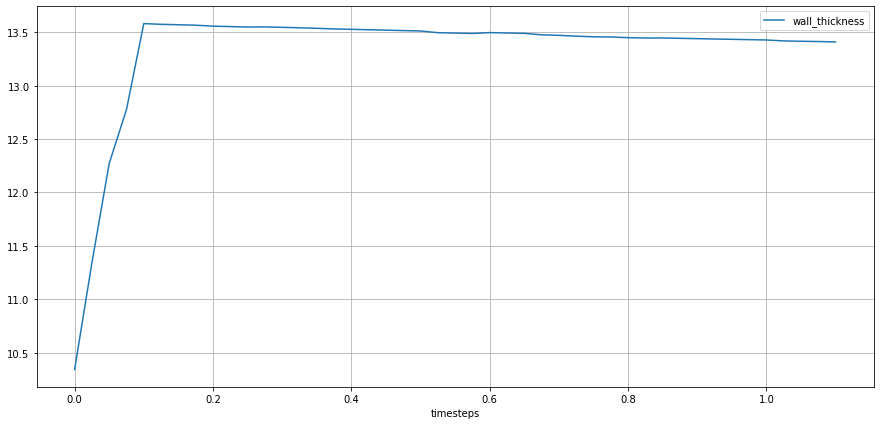

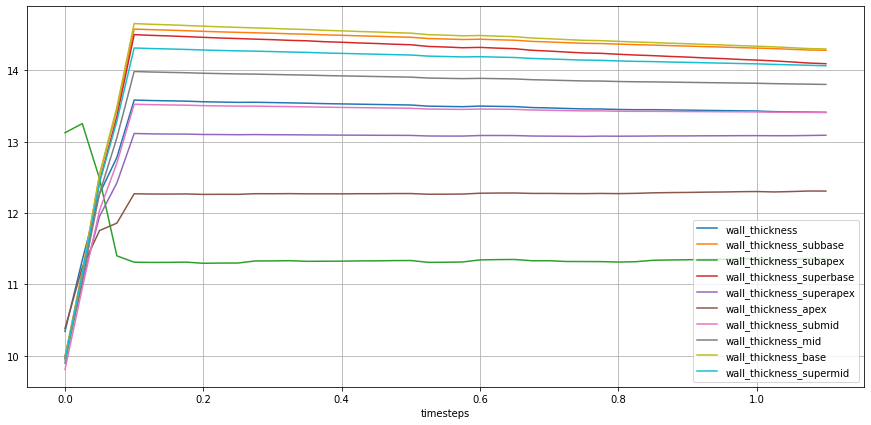

In [8]:
endo_circ_spks = lv.get_speckles(spk_group="endo", spk_collection="circ-6")
epi_circ_spks = lv.get_speckles(spk_group="epi", spk_collection="circ-6")

lv.thickness(endo_circ_spks, epi_circ_spks, recompute=True, log_level=logging.INFO)
lv.plot_metric(lv.STATES.THICKNESS, from_ts=0.0, plot_infos={'name'})